<a href="https://colab.research.google.com/github/Krrish0902/ML_Project/blob/main/AL_ASSIGN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import kagglehub
import os
import seaborn as sns
from sklearn.impute import SimpleImputer

Import all required libraries






In [85]:
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")
csv_path = os.path.join(path, "data.csv")

In [86]:
data=pd.read_csv(csv_path)
(data.head())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Data sheet is read from the path and a portion is displayed along with its distribution

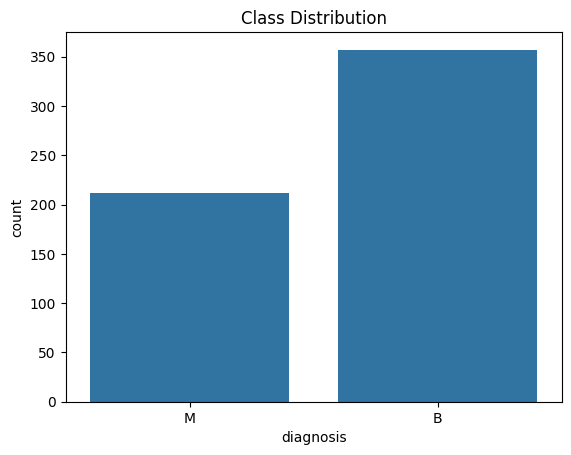

In [87]:
sns.countplot(x='diagnosis', data=data)
plt.title('Class Distribution')
plt.show()

Feature 'diagnosis' is found to be the target variable
* Checked its class distribution for potential class imbalance
* No imbalance found

In [88]:
data.fillna(data.mode().iloc[0], inplace=True)
data = data.drop(columns=['Unnamed: 32'], errors='ignore')


The input features are filtered and cells containing Nan value are replaced with the most frequent of its corresponding column

In [89]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']
X.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Separated the datasheet into 2

1.   **X** -all input features for the prediction
2.   **y** -target variable



In [90]:
if y.dtype == 'object':
    encoder = LabelEncoder()
    y = encoder.fit_transform(y)
print(y[:50])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0]


Encoded the target variable into numerical value

1.   **M** -1
2.   **B** -0



In [91]:
chi2_values, p_values = chi2(X, y)

feature_importance = pd.DataFrame({'Feature': X.columns, 'Chi2 Value': chi2_values, 'p-Value': p_values})
print(feature_importance.sort_values(by='Chi2 Value', ascending=True))

                    Feature    Chi2 Value        p-Value
10   fractal_dimension_mean  7.430655e-05   9.931222e-01
19              symmetry_se  8.036338e-05   9.928474e-01
15            smoothness_se  3.266207e-03   9.544251e-01
20     fractal_dimension_se  6.371366e-03   9.363798e-01
12               texture_se  9.793540e-03   9.211682e-01
5           smoothness_mean  1.498993e-01   6.986316e-01
30  fractal_dimension_worst  2.315224e-01   6.303973e-01
9             symmetry_mean  2.573798e-01   6.119260e-01
18        concave points_se  3.052316e-01   5.806211e-01
25         smoothness_worst  3.973657e-01   5.284529e-01
16           compactness_se  6.137853e-01   4.333661e-01
17             concavity_se  1.044718e+00   3.067268e-01
29           symmetry_worst  1.298861e+00   2.544213e-01
6          compactness_mean  5.403075e+00   2.010130e-02
8       concave points_mean  1.054404e+01   1.165636e-03
28     concave points_worst  1.348542e+01   2.404244e-04
26        compactness_worst  1.

Used **Chi-Square** test to find the correlation between input features to target variable for extracting the least relevant ones

In [92]:
features_to_remove = ['fractal_dimension_mean', 'symmetry_se', 'smoothness_se','fractal_dimension_se','texture_se']
X = X.drop(features_to_remove, axis=1)

Removed the least relevand features

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_train, y_val, y_train = train_test_split(X_train, y_train, test_size=0.8, random_state=42)

Split the data

1.   The whole data into 70% training data and 30% test data
2.   The training data into 80% training data and 20% validation data



In [94]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
print(X_train[:10])

[[ 4.22323700e-01  1.97312508e+00  2.00567626e+00  1.91840871e+00
   2.07150877e+00 -3.02311218e-01  1.08372538e-01  9.82690402e-01
   1.04200753e+00 -1.33250183e+00  5.53988056e-01  5.75931775e-01
   7.90168442e-01 -2.61084906e-01  1.64256842e-01 -1.29463659e-01
   1.83080378e+00  1.95931029e+00  1.80113303e+00  1.88121915e+00
  -4.07172554e-01  1.92445324e-01  7.68423475e-01  7.19958988e-01
  -7.26076542e-01 -1.49171239e-02]
 [-2.36276809e-01 -1.01594242e-03  9.39749155e-02  8.40569993e-03
  -1.17440214e-01  7.57027095e-01  2.28048866e-01  3.95333475e-01
   5.16491846e-01 -5.04150186e-01 -6.54851320e-01 -6.32041072e-01
  -4.48779937e-01 -4.17049417e-01 -3.92906512e-01 -3.66735517e-01
   2.15557850e-01  8.63639953e-01  2.57476125e-01  3.10329784e-02
   1.32770482e+00  7.50674482e-01  7.29007077e-01  1.14287324e+00
   4.54043387e-01  1.26749961e+00]
 [-1.75895448e-01  1.56499485e+00  1.72323931e+00  1.55653199e+00
   1.52084891e+00  4.62970658e-01  8.77140809e-01  1.48633524e+00
   1.4

Standardized all features so that the its mean will be zero and standard deviation will be 1

In [95]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

Created and trained a **k-Nearest Neighbors (k-NN)** classifier using the training data

In [96]:
y_val_pred = knn.predict(X_val)

Predicted the output against our validation data

In [97]:
val_accuracy = accuracy_score(y_val, y_val_pred)
print(y_val[:50])
print(y_val_pred[:50])
print("Validation Accuracy:", val_accuracy)

[0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1
 1 1 0 0 0 1 1 0 0 1 0 0 0]
[0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1
 1 1 0 0 0 1 1 0 0 1 0 0 0]
Validation Accuracy: 1.0


Checked the accuracy against the actual output and predicted output

In [98]:
cm = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[44  0]
 [ 0 35]]


Created the confusion matrix based on the above prediction
* [[TN, FP]
  [FN, TP]]



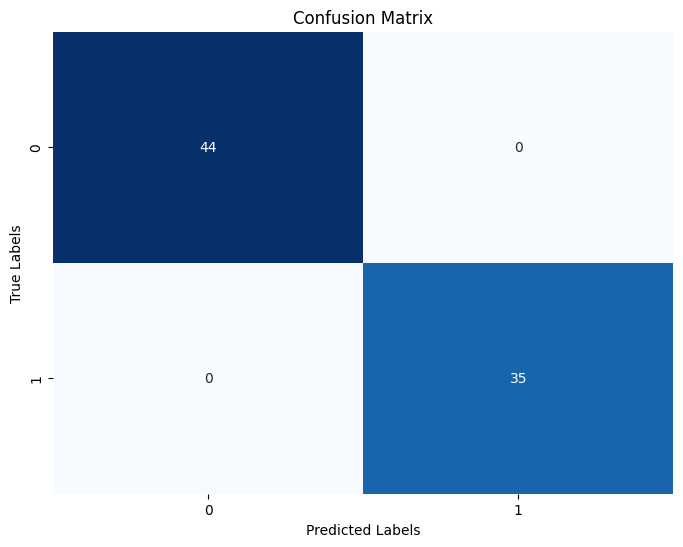

In [99]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [100]:
y_pred = knn.predict(X_test)

Predicted the output against our test data

In [101]:
test_accuracy = accuracy_score(y_test, y_pred)
print(y_test[:50])
print(y_pred[:50])
print("Test Accuracy:", test_accuracy)

[0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0]
[0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0]
Test Accuracy: 0.9707602339181286


Checked the accuracy against the actual output and predicted output

In [102]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[106   2]
 [  3  60]]


Created the confusion matrix based on the above prediction

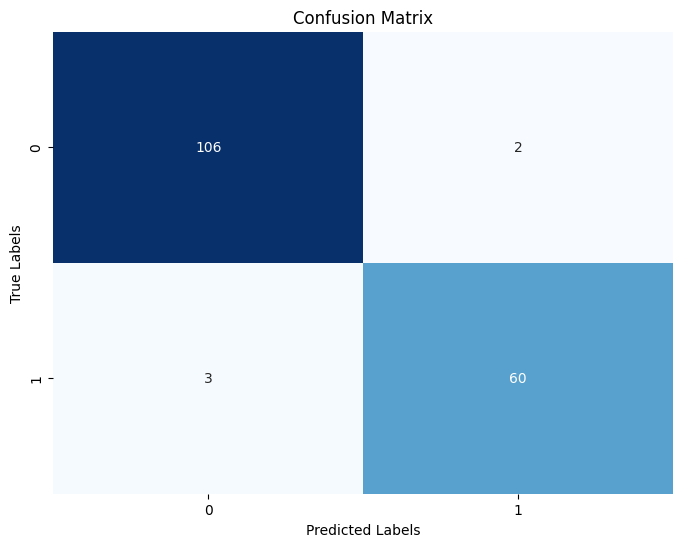

In [103]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()